# Análise de influências no sono de estudantes
Alunos: Daniel Luan e Maria Eduarda Lima

# Sumário

 1. Introdução e primeiros passos
 2. Limpeza e processamento inicial
 3. Análise inicial


Insights possíveis:

- Quais variáveis afetam a qualidade do sono?
- Existem correlações entre estilo de vida, horários de estudo e sono?
- Quais padrões de sono são mais comuns entre os estudantes?

In [ ]:
# Importando bibliotecas necessárias e configurando o ambiente

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

 1. Introdução e primeiros passos
 2. Limpeza e processamento inicial
 3. Análise inicial

# Introdução e primeiros passos

Primeiros passos e primeiro contato com o dataset.

In [ ]:
# Carregamento dos dados

student_df = pd.read_csv('student_sleep_patterns.csv')

In [ ]:
# Exibindo as primeiras 5 linhas do dataframe

student_df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [ ]:
# Exibindo as ultimas 5 linhas do dataframe

student_df.tail()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20
499,500,21,Male,3rd Year,7.9,11.6,1.0,0,86,1,7.54,14.12,7.01,9.19


In [ ]:
# Exibindo informações gerais do dataframe

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [ ]:
# Exibindo colunas
student_df.columns

Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

O DataFrame contém 14 colunas, sendo elas:

- **Student_ID**: Identificador único para cada estudante (inteiro).
- **Age**: Idade do estudante em anos (inteiro).
- **Gender**: Gênero do estudante (categórico: 'Male', 'Female', 'Other').
- **University_Year**: Ano atual do estudante na universidade (categórico: '1st Year', '2nd Year', '3rd Year', '4th Year').
- **Sleep_Duration**: Total de horas de sono por noite (float).
- **Study_Hours**: Média de horas diárias dedicadas ao estudo (float).
- **Screen_Time**: Média de horas diárias em telas (excluindo estudo) (float).
- **Caffeine_Intake**: Média de bebidas cafeinadas consumidas por dia (inteiro).
- **Physical_Activity**: Média de minutos diários dedicados a atividades físicas (inteiro).
- **Sleep_Quality**: Avaliação subjetiva da qualidade do sono em uma escala de 1 a 10 (1 sendo a pior e 10 sendo a melhor) (inteiro).
- **Weekday_Sleep_Start**: Horário típico em que o estudante dorme durante a semana (float, no formato de 24 horas, ex.: 23.00 corresponde a 23h).
- **Weekend_Sleep_Start**: Horário típico em que o estudante dorme durante o final de semana (float, no formato de 24 horas).
- **Weekday_Sleep_End**: Horário típico em que o estudante acorda durante a semana (float, no formato de 24 horas).
- **Weekend_Sleep_End**: Horário típico em que o estudante acorda durante o final de semana (float, no formato de 24 horas).

### Classificação das variáveis:
- **Variáveis numéricas**: Sleep_Duration, Study_Hours, Caffeine_Intake, entre outras.
- **Variáveis categóricas**: Gender, University_Year.

In [ ]:
# Exibe o número de valores únicos em cada coluna do DataFrame
student_df.nunique()

Student_ID             500
Age                      8
Gender                   3
University_Year          4
Sleep_Duration          51
Study_Hours            116
Screen_Time             31
Caffeine_Intake          6
Physical_Activity      120
Sleep_Quality           10
Weekday_Sleep_Start    452
Weekend_Sleep_Start    442
Weekday_Sleep_End      289
Weekend_Sleep_End      297
dtype: int64

In [ ]:
# Estatísticas descritivas do dataframe antes de limpeza

student_df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


## Limpeza e processamento inicial

## Dados nulos

Como podemos ver abaixo, o dataset não possui valores nulos.

In [ ]:
# Exibindo valores nulos no dataset

student_df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

## Valores duplicados

In [ ]:
# Exibir se existem linhas duplicadas

student_df.duplicated().any()

np.False_

O resultado deu *false* logo não existem linhas duplicadas no DataFrame, podemos dizer que todas as linhas são únicas.

## Outliers

In [ ]:
# Detecção de outliers usando método interquartis para colunas numéricas

numeric_columns = student_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = student_df[col].quantile(0.25)
    Q3 = student_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = student_df[(student_df[col] < lower_bound) | (student_df[col] > upper_bound)]
    print(f"Outliers em {col}: {outliers.shape[0]}")

Outliers em Student_ID: 0
Outliers em Age: 0
Outliers em Sleep_Duration: 0
Outliers em Study_Hours: 0
Outliers em Screen_Time: 0
Outliers em Caffeine_Intake: 0
Outliers em Physical_Activity: 0
Outliers em Sleep_Quality: 0
Outliers em Weekday_Sleep_Start: 0
Outliers em Weekend_Sleep_Start: 0
Outliers em Weekday_Sleep_End: 0
Outliers em Weekend_Sleep_End: 0


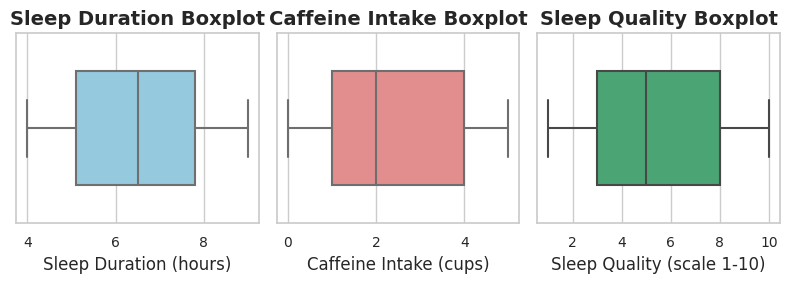

In [ ]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
sns.boxplot(
    x=student_df['Sleep_Duration'],
    color="skyblue",
    linewidth=1.5,
    width=0.6,
    flierprops=dict(marker="o", color="red", alpha=0.5)
)
plt.title('Sleep Duration Boxplot', fontsize=14, fontweight="bold")
plt.xlabel("Sleep Duration (hours)", fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(1, 3, 2)
sns.boxplot(
    x=student_df['Caffeine_Intake'],
    color="lightcoral",
    linewidth=1.5,
    width=0.6,
    flierprops=dict(marker="D", color="blue", alpha=0.5)
)
plt.title('Caffeine Intake Boxplot', fontsize=14, fontweight="bold")
plt.xlabel("Caffeine Intake (cups)", fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(1, 3, 3)
sns.boxplot(
    x=student_df['Sleep_Quality'],
    color="mediumseagreen",
    linewidth=1.5,
    width=0.6,
    flierprops=dict(marker="*", color="purple", alpha=0.5)
)
plt.title('Sleep Quality Boxplot', fontsize=14, fontweight="bold")
plt.xlabel("Sleep Quality (scale 1-10)", fontsize=12)
plt.xticks(fontsize=10)

plt.tight_layout()

plt.show()


# Análise Inicial

## Variáveis numéricas

Uma visão geral das variáveis numéricas do dataset.

In [ ]:
student_df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


- Publico jovem
- Média de sono abaixo do indicado para a idade (7-9 horas por dia)

## Matriz de correlação

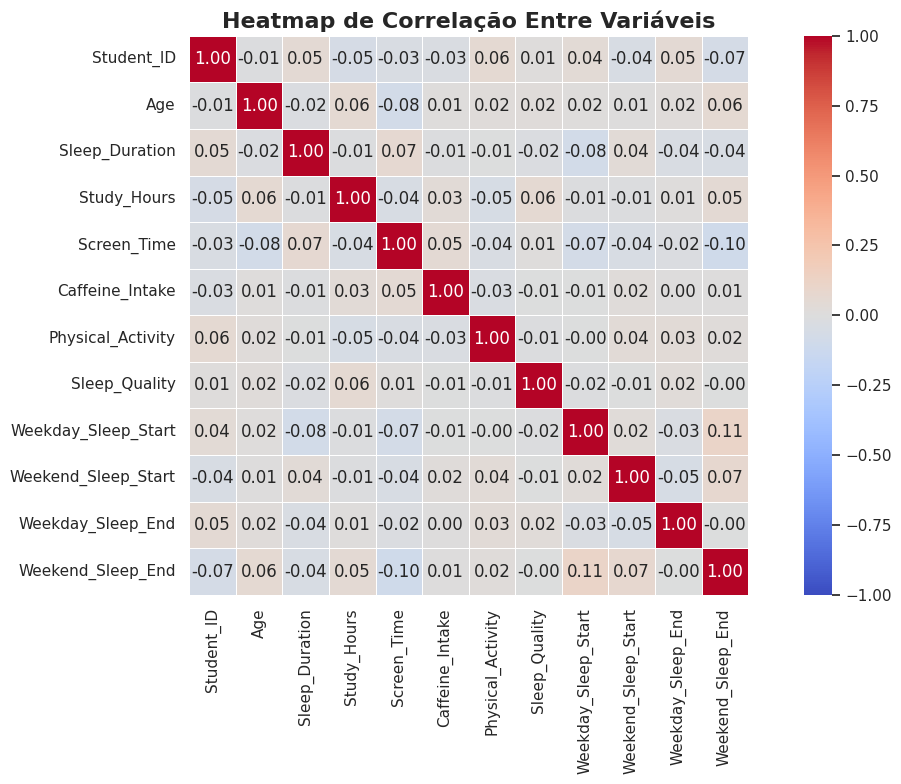

In [ ]:
numeric_columns = student_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = student_df[numeric_columns].corr()

sns.set_theme(style="white")

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True
)

plt.title("Heatmap de Correlação Entre Variáveis", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

Baixa correlação no geral entre variáveis.

O que podemos verificar:
- **Sleep_Duration e Sleep_Quality**: Correlação muito baixa, indicando que a duração do sono pode não estar linearmente relacionada com a qualidade do sono neste dataset.
- **Physical_Activity e Sleep_Quality**: Correlação quase inexistente, o que é contraintuitivo, já que mais atividade física pode melhorar a qualidade do sono. Talvez outros fatores estejam interferindo

## Variáveis categóricas

Rápida exibição das variáveis categóricas.

### University Year

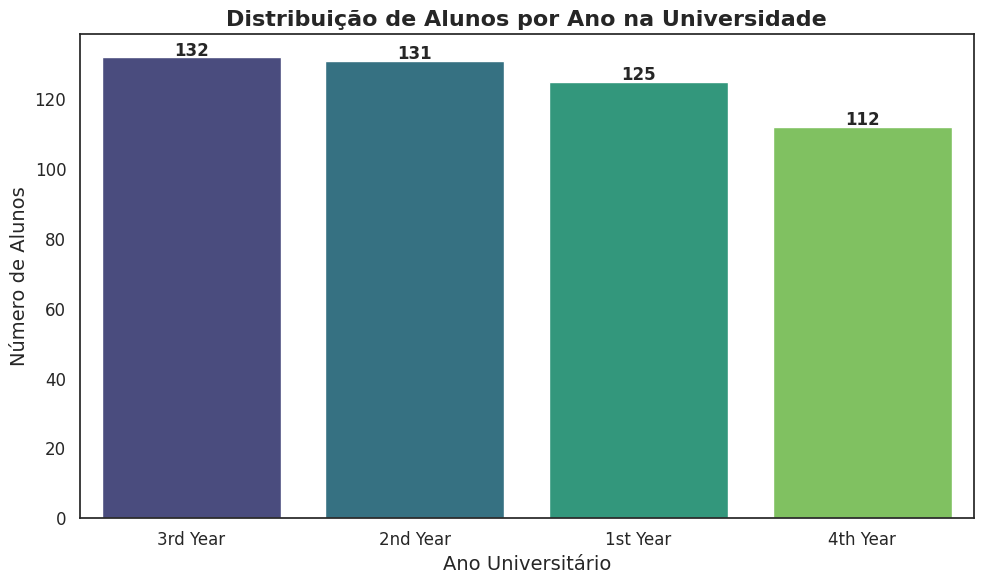

In [ ]:
# Exibir gráfico com a distribuição de Sleep_Duration

year_distribution = student_df['University_Year'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=year_distribution.index,
    y=year_distribution.values,
    palette="viridis",
    hue=year_distribution.index
)

plt.title("Distribuição de Alunos por Ano na Universidade", fontsize=16, fontweight="bold")
plt.xlabel("Ano Universitário", fontsize=14)
plt.ylabel("Número de Alunos", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(year_distribution.values):
    plt.text(i, value + 0.5, str(value), ha="center", fontsize=12, fontweight="bold")

plt.tight_layout()

plt.show()


### Gêneros

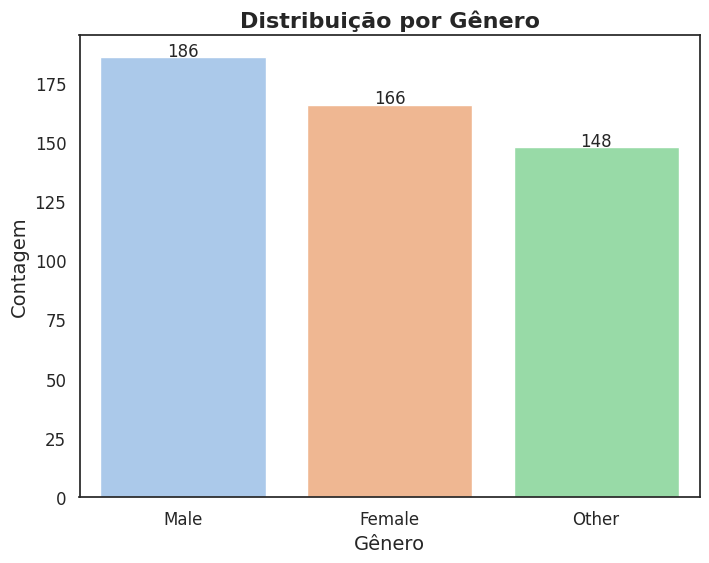

In [ ]:
# Gráfico de barras para a distribuição de gênero no dataset

gender_counts = student_df['Gender'].value_counts()

plt.figure(figsize=(8 , 6))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette="pastel",
    hue=gender_counts.index
)

plt.title("Distribuição por Gênero", fontsize=16, fontweight="bold")
plt.xlabel("Gênero", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 0.5, str(value), ha="center", fontsize=12)

plt.show()

## Distribuição de variáveis

### Distribuição da duração do sono, qualidade do sono e distribuição das horas de estudo

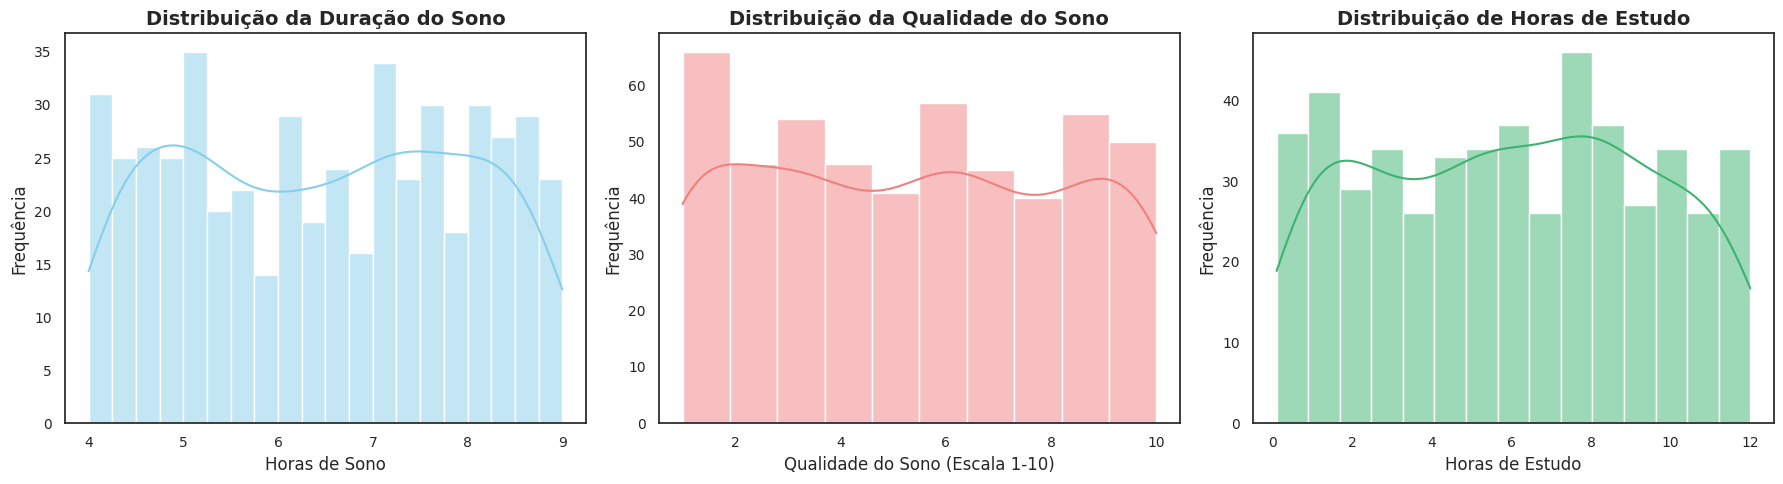

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(student_df['Sleep_Duration'], bins=20, kde=True, color="skyblue")
plt.title('Distribuição da Duração do Sono', fontsize=14, fontweight="bold")
plt.xlabel('Horas de Sono', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 2)
sns.histplot(student_df['Sleep_Quality'], bins=10, kde=True, color="lightcoral")
plt.title('Distribuição da Qualidade do Sono', fontsize=14, fontweight="bold")
plt.xlabel('Qualidade do Sono (Escala 1-10)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 3)
sns.histplot(student_df['Study_Hours'], bins=15, kde=True, color="mediumseagreen")
plt.title('Distribuição de Horas de Estudo', fontsize=14, fontweight="bold")
plt.xlabel('Horas de Estudo', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()

## Comparando a duração do sono com variáveis

## Duração do Sono X Qualidade do Sono

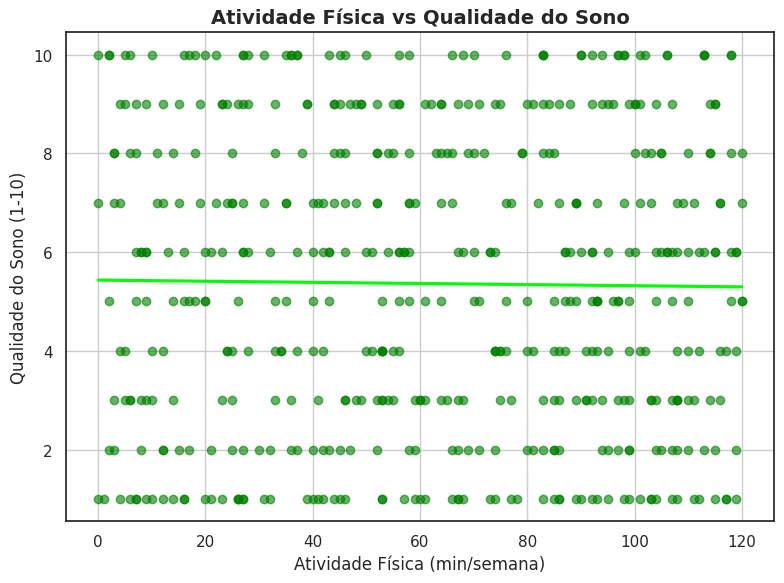

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(
    x='Physical_Activity',
    y='Sleep_Quality',
    data=student_df,
    scatter_kws={'alpha': 0.6, 'color': 'green'},
    line_kws={'color': 'lime'},
    ci=None
)
plt.title('Atividade Física vs Qualidade do Sono', fontsize=14, fontweight='bold')
plt.xlabel('Atividade Física (min/semana)', fontsize=12)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=12)
plt.grid(True)

# Ajustar o layout
plt.tight_layout()
plt.show()

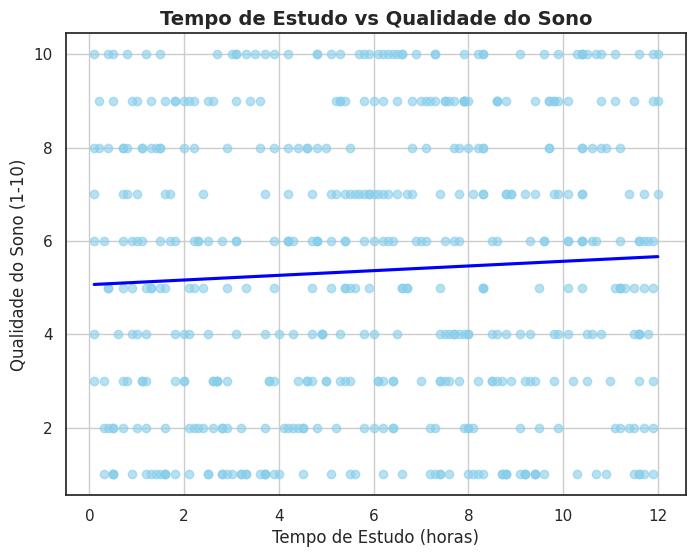

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Study_Hours',
    y='Sleep_Quality',
    data=student_df,
    scatter_kws={'alpha': 0.6, 'color': 'skyblue'},
    line_kws={'color': 'blue'},
    ci=None
)
plt.title('Tempo de Estudo vs Qualidade do Sono', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Estudo (horas)', fontsize=12)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=12)
plt.grid(True)

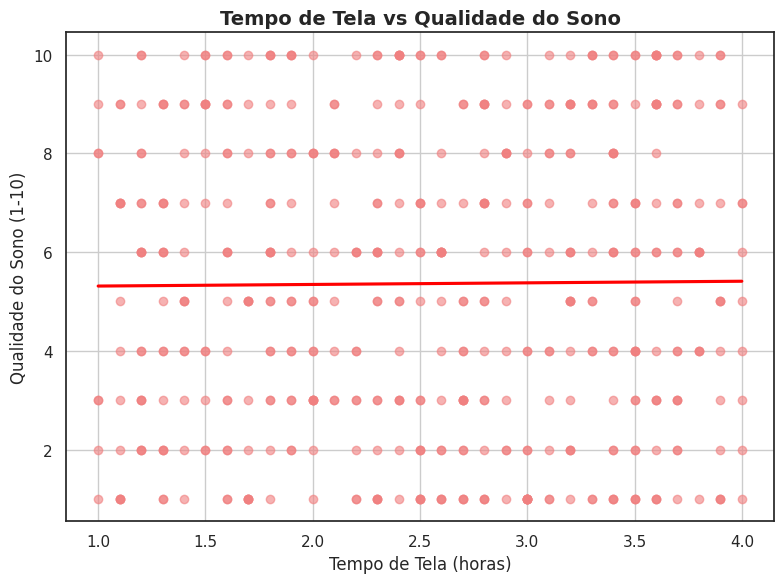

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Screen_Time',
    y='Sleep_Quality',
    data=student_df,
    scatter_kws={'alpha': 0.6, 'color': 'lightcoral'},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Tempo de Tela vs Qualidade do Sono', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Tela (horas)', fontsize=12)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=12)
plt.grid(True)

# Ajustar o layout
plt.tight_layout()
plt.show()

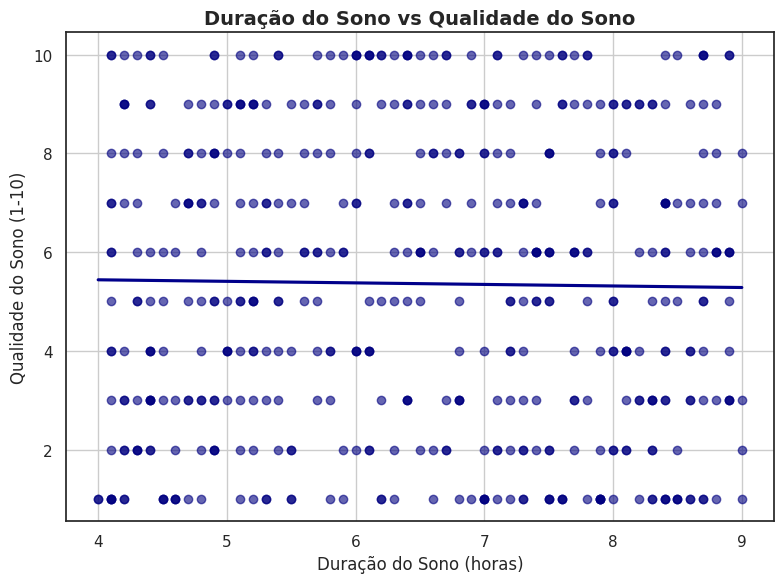

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Sleep_Duration',
    y='Sleep_Quality',
    data=student_df,
    scatter_kws={'alpha': 0.6, 'color': 'navy'},
    line_kws={'color': 'darkblue'},
    ci=None
)
plt.title('Duração do Sono vs Qualidade do Sono', fontsize=14, fontweight='bold')
plt.xlabel('Duração do Sono (horas)', fontsize=12)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=12)
plt.grid(True)

# Ajustar o layout
plt.tight_layout()
plt.show()



Fatores adicionais influenciando a qualidade do sono**: Variáveis como atividade física, tempo de tela, ou consumo de cafeína podem ser mais relevantes para a qualidade do sono do que apenas a duração.

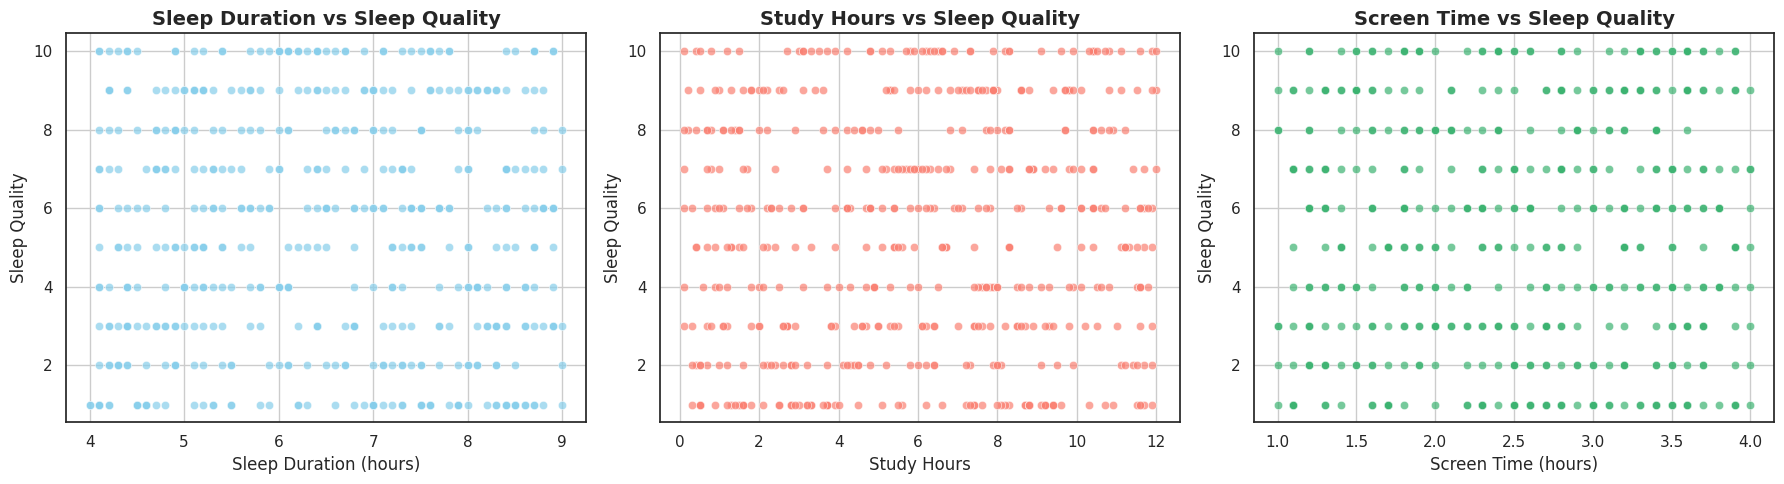

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Sleep_Duration', y='Sleep_Quality', data=student_df, alpha=0.7, color="skyblue")
plt.title('Sleep Duration vs Sleep Quality', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.scatterplot(x='Study_Hours', y='Sleep_Quality', data=student_df, alpha=0.7, color="salmon")
plt.title('Study Hours vs Sleep Quality', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Quality')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.scatterplot(x='Screen_Time', y='Sleep_Quality', data=student_df, alpha=0.7, color="mediumseagreen")
plt.title('Screen Time vs Sleep Quality', fontsize=14, fontweight='bold')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Sleep Quality')
plt.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_206886/3230732819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


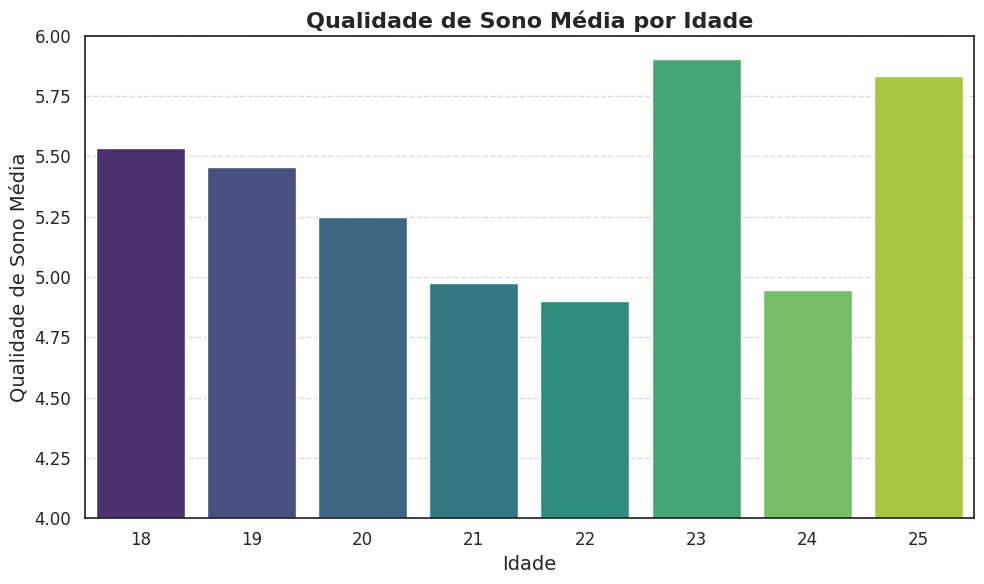

In [ ]:
avg_sleep_quality_by_age = student_df.groupby('Age')['Sleep_Quality'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age',
    y='Sleep_Quality',
    data=avg_sleep_quality_by_age,
    palette='viridis'
)

plt.title('Qualidade de Sono Média por Idade', fontsize=16, fontweight='bold')
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Qualidade de Sono Média', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(4, 6)


plt.tight_layout()
plt.show()

/tmp/ipykernel_206886/433469501.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_206886/433469501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


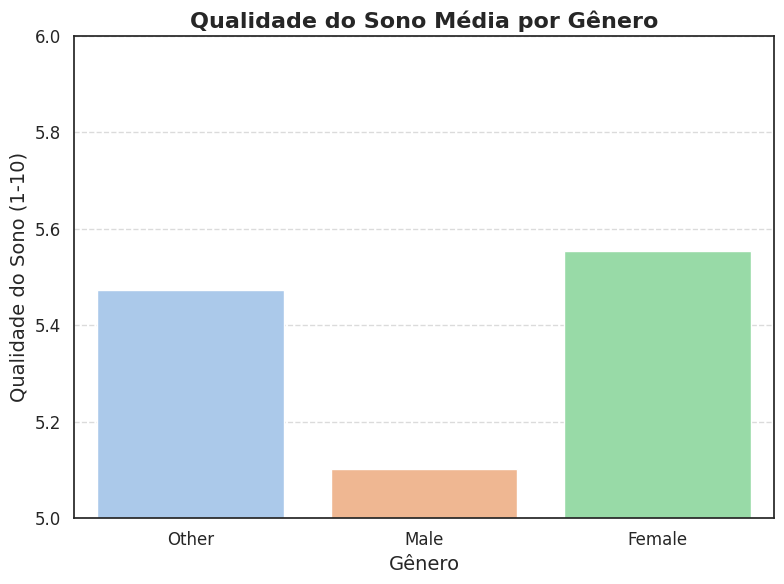

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Gender',
    y='Sleep_Quality',
    data=student_df,
    palette='pastel',
    ci=None
)

plt.title('Qualidade do Sono Média por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(5, 6)

plt.tight_layout()
plt.show()

/tmp/ipykernel_206886/1620949580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


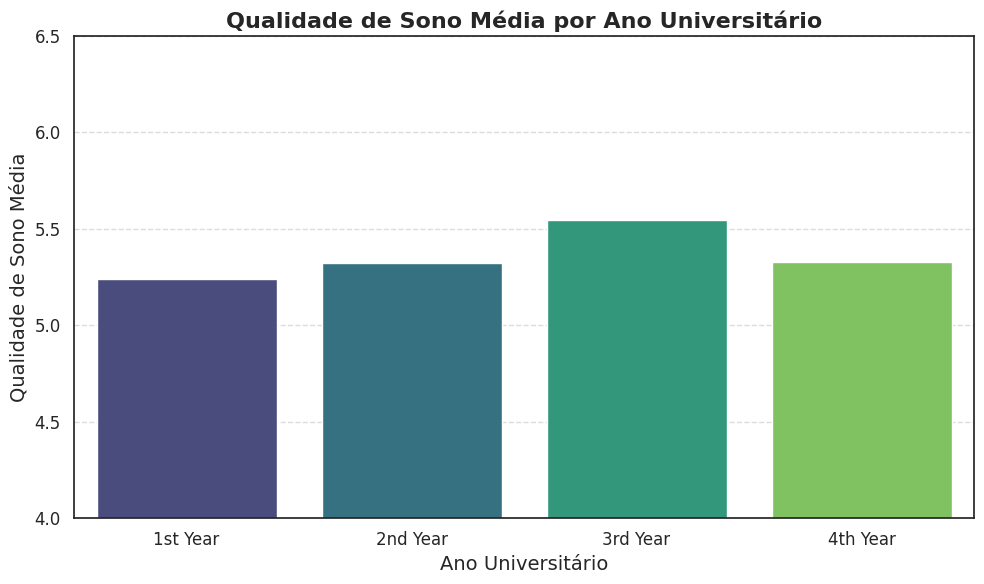

In [ ]:
avg_sleep_quality_by_year = student_df.groupby('University_Year')['Sleep_Quality'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='University_Year',
    y='Sleep_Quality',
    data=avg_sleep_quality_by_year,
    palette='viridis'
)

plt.title('Qualidade de Sono Média por Ano Universitário', fontsize=16, fontweight='bold')
plt.xlabel('Ano Universitário', fontsize=14)
plt.ylabel('Qualidade de Sono Média', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(4, 6.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

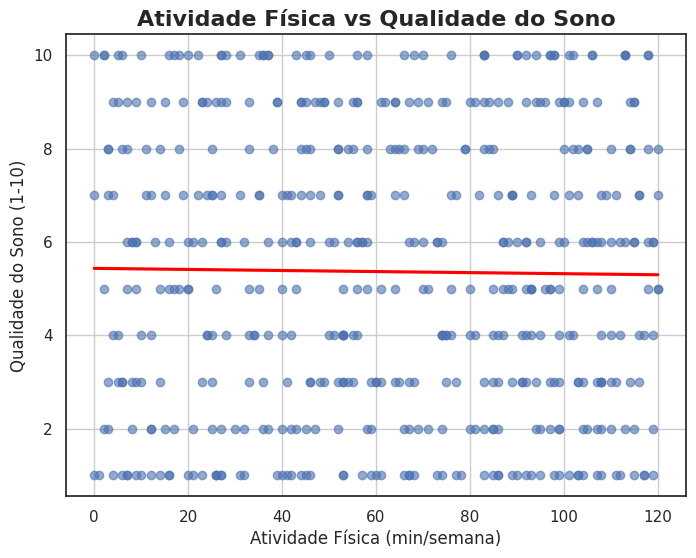

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Physical_Activity',
    y='Sleep_Quality',
    data=student_df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Atividade Física vs Qualidade do Sono', fontsize=16, fontweight='bold')
plt.xlabel('Atividade Física (min/semana)', fontsize=12)
plt.ylabel('Qualidade do Sono (1-10)', fontsize=12)
plt.grid(True)
plt.show()
